In [595]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Time-Series

In [596]:
Gas_Furnace=pd.read_csv('gas-furnace.csv')

<AxesSubplot:>

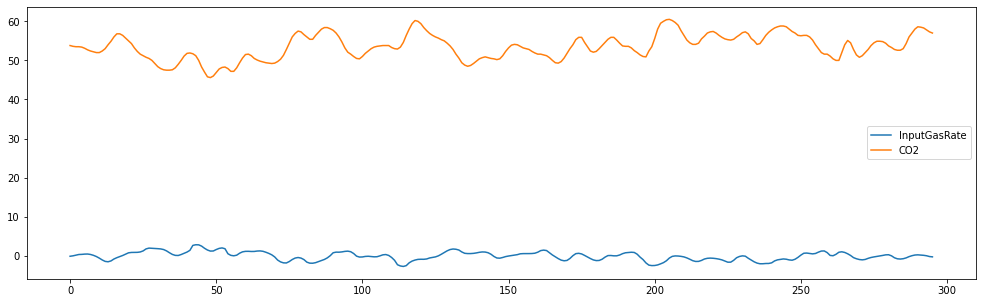

In [597]:
Gas_Furnace.plot()

<AxesSubplot:>

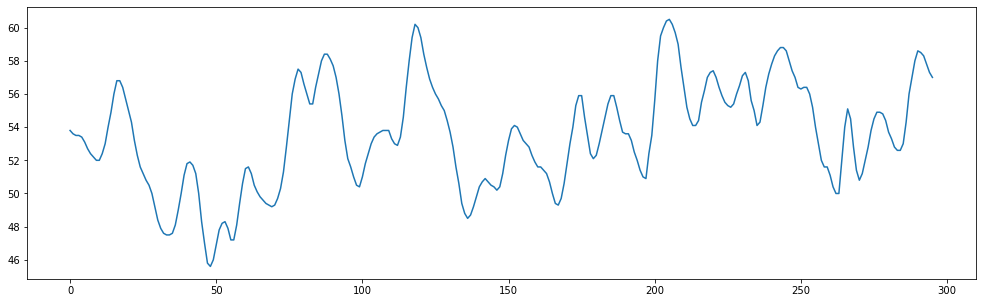

In [598]:
Gas_Furnace['CO2'].plot()

<AxesSubplot:>

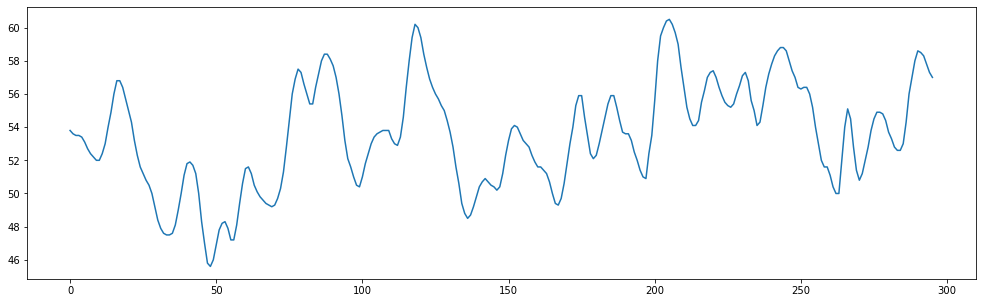

In [599]:
Gas_Furnace['CO2'].plot()

The daily-min-temperatures dataset describes the minimum daily temperature over 10 years (1981-1990) in the city of Melbourne, Australia. Adapted from [time-seriesdata-visualization-with-python](https://machinelearningmastery.com/time-series-data-visualization-with-python/).

In [600]:
Daily_Temp=pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0,parse_dates=True)

<AxesSubplot:xlabel='Date'>

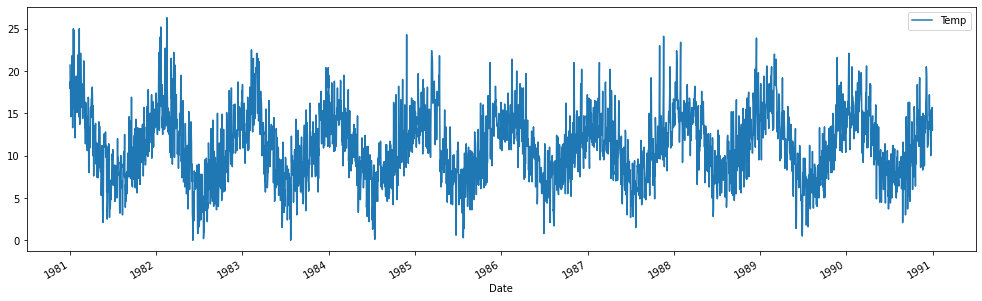

In [601]:
Daily_Temp.plot()

<AxesSubplot:xlabel='Date'>

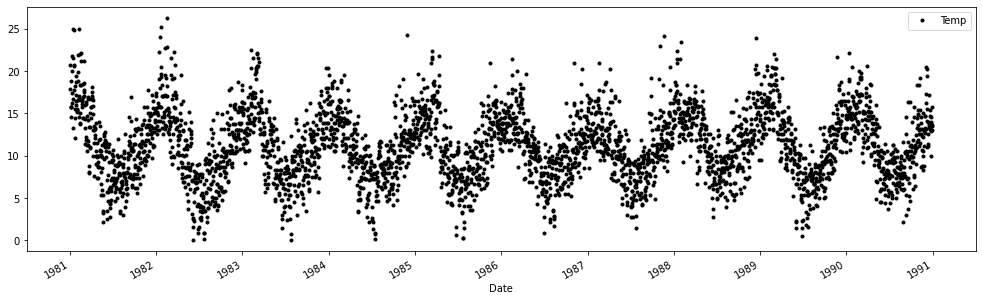

In [602]:
Daily_Temp.plot(style='k.')

In [603]:
# parse date into datetime object adn set that as the index for the rows; squeeze into a Series with temperatures as the values
Daily_TempA=pd.read_csv('daily-min-temperatures.csv',parse_dates=['Date'])
Daily_TempA=Daily_TempA.set_index('Date')
Daily_TempA_Series=Daily_TempA['Temp'].squeeze()
type(Daily_TempA_Series)

pandas.core.series.Series

In [604]:
Daily_TempA_Series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [605]:
from pandas import Grouper

In [606]:
#create groups using Grouper and freq of datetime object being 'A' the end date year
groups=Daily_TempA_Series.groupby(Grouper(freq='A'))

In [607]:
# look at the name in groups
for name,group in groups:
    print(name)

1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00


Text(0, 0.5, 'Daily Min Temp')

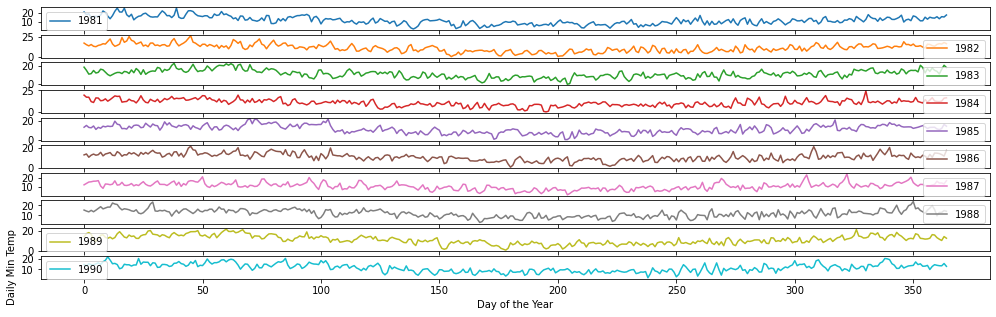

In [620]:
# create empty DataFrame; for loop for each year create a DataFrame that adds the value of the group to each year; print in a subplot 
years= pd.DataFrame()
for name,group in groups:
    years[name.year]=group.values
years.plot(subplots=True, legend=True)
plt.xlabel('Day of the Year')
plt.ylabel('Daily Min Temp')

In [621]:
type(years)

pandas.core.frame.DataFrame

In [622]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


# Mosaic Plots using Titanic dataset.  This dataset is often used to predict survival or death using information about the passengers.  

In [623]:
from statsmodels.graphics.mosaicplot import mosaic

In [624]:
Titanic = pd.read_csv('Titanic Dataset Class.csv')

In [625]:
Titanic.head()

,PassengerId,SurvivedKaggleData,SurvivedWiki,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,...,Hometown,Boarded,Destination,BodyWiki,NameChecks,LifeBoat,MinutesLifeboatLaunch,TypeofLifeBoat,LifeboatSide,CapacityLifBoat
0,1,0.0,0,3,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,...,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,NaN,NaN
1,2,1.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,...,"New York, New York, US",Cherbourg,"New York, New York, US",NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,115.0,Lifeboat,Starboard,55.0
2,3,1.0,1,3,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,...,"Jyväskylä, Finland",Southampton,New York City,NaN,"Heikkinen, Miss. Laina",14,90.0,Lifeboat,Starboard,55.0
3,4,1.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,...,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",D,125.0,Collapsible,Starboard,37.0
4,5,0.0,0,3,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,...,"Birmingham, West Midlands, England",Southampton,New York City,NaN,"Allen, Mr. William Henry",NaN,NaN,NaN,NaN,NaN


Name some of our target variables that are categorical as more meaningful names. 

In [626]:
Titanic['Survival']=Titanic.SurvivedWiki.map({0:'Died',1:'Survived'})
Titanic['PassengerClass']=Titanic.Pclass.map({1:'FirstClass',2:'SecondClass',3:'ThirdClass'})

crosstab will provide a table using a pandas dataframe: [pd.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)  Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [627]:
pd.crosstab(Titanic['Pclass'],Titanic['Sex'],Titanic['SurvivedWiki'],aggfunc=np.sum)

Sex,female,male
Pclass,,
1,139,62
2,94,25
3,106,74


In [628]:
Titanic.head()

,PassengerId,SurvivedKaggleData,SurvivedWiki,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,...,Destination,BodyWiki,NameChecks,LifeBoat,MinutesLifeboatLaunch,TypeofLifeBoat,LifeboatSide,CapacityLifBoat,Survival,PassengerClass
0,1,0.0,0,3,"Braund, Mr. Owen Harris",male,1.0,0.0,A/5 21171,7.2500,...,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,"Braund, Mr. Owen Harris",NaN,NaN,NaN,NaN,NaN,Died,ThirdClass
1,2,1.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0,PC 17599,71.2833,...,"New York, New York, US",NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,115.0,Lifeboat,Starboard,55.0,Survived,FirstClass
2,3,1.0,1,3,"Heikkinen, Miss. Laina",female,0.0,0.0,STON/O2. 3101282,7.9250,...,New York City,NaN,"Heikkinen, Miss. Laina",14,90.0,Lifeboat,Starboard,55.0,Survived,ThirdClass
3,4,1.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0,113803,53.1000,...,"Scituate, Massachusetts, US",NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",D,125.0,Collapsible,Starboard,37.0,Survived,FirstClass
4,5,0.0,0,3,"Allen, Mr. William Henry",male,0.0,0.0,373450,8.0500,...,New York City,NaN,"Allen, Mr. William Henry",NaN,NaN,NaN,NaN,NaN,Died,ThirdClass


In [629]:
pd.crosstab([Titanic['PassengerClass'],Titanic['Sex']],Titanic['Survival'],margins=True)

Survival               Died  Survived   All
PassengerClass Sex                         
FirstClass     female     5       139   144
               male     118        62   180
SecondClass    female    12        94   106
               male     153        25   178
ThirdClass     female   110       106   216
               male     419        74   493
All                     817       500  1317

In [630]:
# make a table of percentage of all passengers withn group who survived or dies
tableTitanic=pd.crosstab([Titanic['PassengerClass'],Titanic['Sex']],Titanic['Survival'],normalize='all')

In [631]:
tableTitanic

Survival                   Died  Survived
PassengerClass Sex                       
FirstClass     female  0.003797  0.105543
               male    0.089598  0.047077
SecondClass    female  0.009112  0.071374
               male    0.116173  0.018983
ThirdClass     female  0.083523  0.080486
               male    0.318147  0.056188

In [632]:
pd.crosstab(Titanic['PassengerClass'],Titanic['Survival'],normalize='index')

Survival,Died,Survived
PassengerClass,,
FirstClass,0.379630,0.620370
SecondClass,0.580986,0.419014
ThirdClass,0.746121,0.253879


In [633]:
pd.crosstab(Titanic['Sex'],Titanic['Survival'],normalize='index')

Survival,Died,Survived
Sex,,
female,0.272532,0.727468
male,0.810811,0.189189


Create a mosaic plot from the Titanic Data

(<Figure size 1224x360 with 3 Axes>,
 {('Died', 'ThirdClass', 'male'): (0.0,
   0.0,
   0.4878255497460508,
   0.6432028013974562),
  ('Died', 'ThirdClass', 'female'): (0.4891942037678787,
   0.0,
   0.12806876007652884,
   0.6432028013974562),
  ('Died', 'FirstClass', 'male'): (0.0,
   0.6465140596756019,
   0.5908579557647511,
   0.14955377045725354),
  ('Died', 'FirstClass', 'female'): (0.5922266097865792,
   0.6465140596756019,
   0.02503635405782844,
   0.14955377045725354),
  ('Died', 'SecondClass', 'male'): (0.0,
   0.7993790884110012,
   0.5711019963809374,
   0.20062091158899867),
  ('Died', 'SecondClass', 'female'): (0.5724706504027655,
   0.7993790884110012,
   0.04479231344164217,
   0.20062091158899867),
  ('Survived', 'ThirdClass', 'male'): (0.6222380882225169,
   0.0,
   0.15495776868921152,
   0.35761589403973504),
  ('Survived', 'ThirdClass', 'female'): (0.7780334664722106,
   0.0,
   0.22196653352778947,
   0.35761589403973504),
  ('Survived', 'FirstClass', 'male'): (

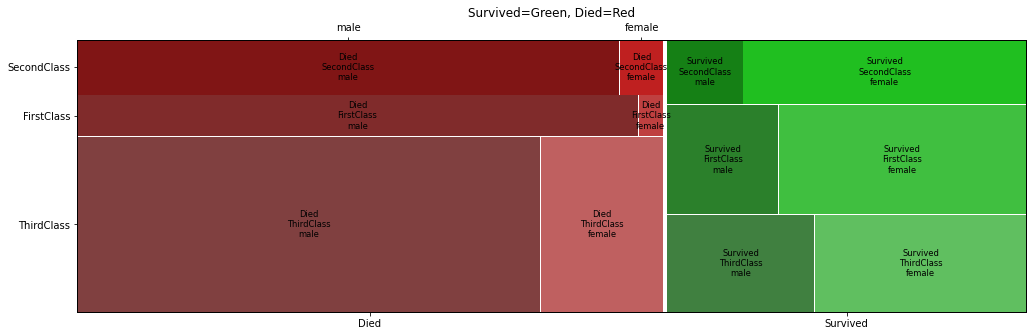

In [634]:
plt.rc('figure',figsize=(17,5))
mosaic(Titanic,['Survival','PassengerClass','Sex'],title='Survived=Green, Died=Red')

# Heatmaps

In [635]:
groupTitanic=Titanic.groupby(['PassengerClass','Survival'])

In [636]:
PassengerClass_Heatmap=groupTitanic.size().unstack()

<AxesSubplot:xlabel='Survival', ylabel='PassengerClass'>

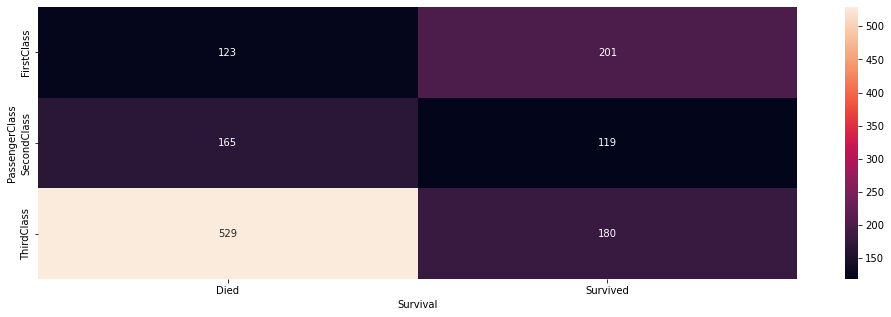

In [637]:
sns.heatmap(PassengerClass_Heatmap,annot=True,fmt="d")

<AxesSubplot:xlabel='Survival', ylabel='PassengerClass'>

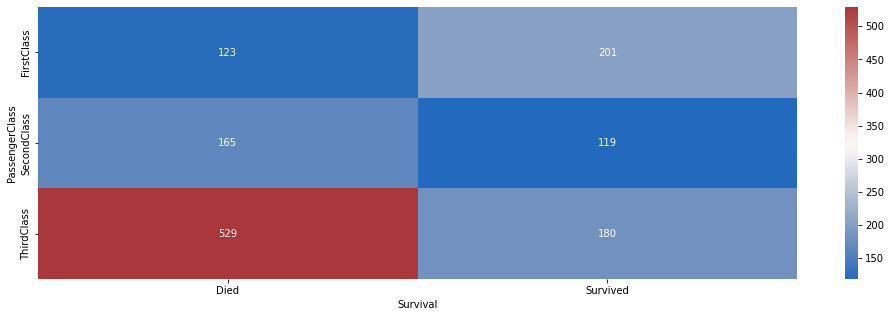

In [638]:
sns.heatmap(PassengerClass_Heatmap,annot=True,fmt="d",cmap='vlag')

<AxesSubplot:xlabel='Survival', ylabel='PassengerClass-Sex'>

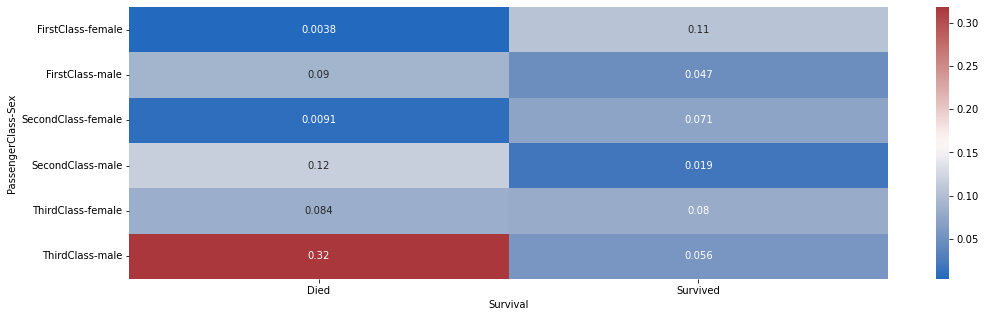

In [639]:
# percentage of those within each group (row) that died or survived, of all passengers
sns.heatmap(tableTitanic,annot=True,cmap='vlag')